# EXERCICIO 1
Use a imagem circulo.png para implementar um código que:
- Segmenta apenas os círculos maiores da imagem, use a técnica que achar melhor. E exibe o resultado. (máx 3 pontos) 

- Exibe na imagem a área e o centro de massa dos dois círculos segmentados da imagem. O resultado esperado e uma imagem com um marcação no centro indicando o CM e o valor da área; (máx 3 pontos) 

[198.5, 199.5]


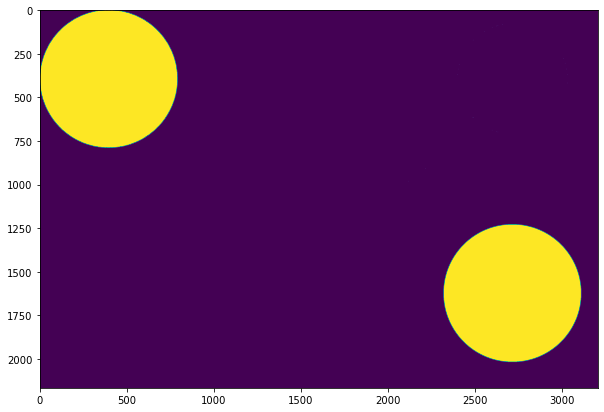

In [5]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

img = cv.imread('circulo.png')
cimg = cv.cvtColor(img,cv.COLOR_BGR2HSV)

min_red_hsv = np.array([0,50,50])
max_red_hsv = np.array([10,250,222])

redImage = cv.inRange(cimg,min_red_hsv,max_red_hsv)

min_cyan_hsv = np.array([85,100,100])
max_cyan_hsv = np.array([86,255,255])

cyanImage = cv.inRange(cimg,min_cyan_hsv,max_cyan_hsv)
finalImage = cv.bitwise_or(redImage,cyanImage)


circles = cv.HoughCircles(finalImage,cv.HOUGH_GRADIENT,dp=10,minDist=400,param1=400,param2=600,minRadius=350,maxRadius=450)

circles = np.uint16(np.around(circles))
mask = np.zeros(cimg.shape[:2],dtype="uint8")
raio = []

for i in circles[0,:]:
    cv.circle(mask,(i[0],i[1]),i[2],(255,255,255),-1)
    raio.append(i[2]/2)

print(raio)
cimg = cv.bitwise_and(cimg,cimg,mask=mask)
gray = cv.cvtColor(cimg, cv.COLOR_BGR2GRAY)
gray = cv.blur(gray, (2,2))

plt.figure(figsize = (10,10))   
plt.imshow(finalImage)

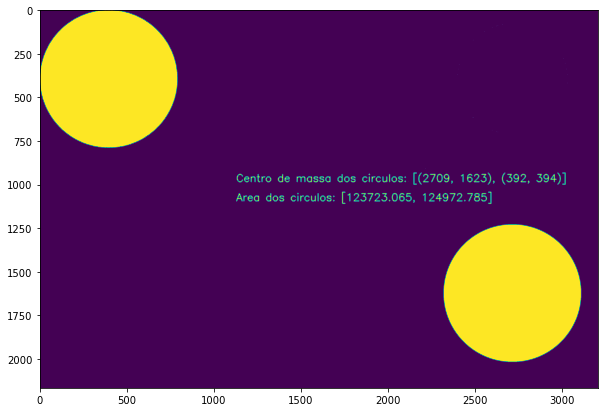

In [6]:
contornos, _ = cv.findContours(gray, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
centres = []
for i in range(len(contornos)):
  moments = cv.moments(contornos[i])
  if moments['m10'] and moments['m00']:
    centres.append((int(moments['m10']/moments['m00']), int(moments['m01']/moments['m00'])))

# setup text
font = cv.FONT_HERSHEY_SIMPLEX
area = []
pi = 3.14
for i in range(len(raio)):
  result = pi * (raio[i] ** 2)
  area.append(result)

centro = f'Centro de massa dos circulos: {centres}'
areaTexto = f'Area dos circulos: {area}'

# get boundary of text
textsize = cv.getTextSize(centro, font, 1, 2)[0]

# get coords based on boundary
textX = int((finalImage.shape[1] - textsize[0]) / 2)
textY = int((finalImage.shape[0] + textsize[1]) / 2)

cimg2 = finalImage.copy()

cv.putText(cimg2, centro, (textX, (textY-(5*textsize[1]))), font, 2, (255, 255, 255), 4)
cv.putText(cimg2, areaTexto, (textX, textY), font, 2, (255, 255, 255), 4)

plt.figure(figsize = (10,10))
plt.imshow(cimg2)

# EXERCICIO 2
Faz o R1 e:
- Traça uma reta entre os dois centros dos círculos; (máx 0,5 pontos)

- Calcula o ângulo de inclinação da reta em relação ao plano horizontal, inclinação em graus. O resultado esperado é uma imagem com  uma reta entre centros e valor do ângulo exibido na tela;  (máx 1,5 pontos)


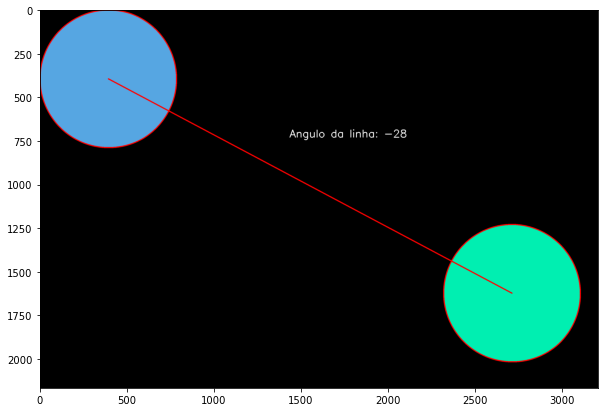

In [20]:
import math

img_rgb = cv.cvtColor(cimg, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(cimg, cv.COLOR_BGR2HSV)

contornos_img = cimg.copy()

image_lower_hsv = np.array([10, 10, 10])
image_upper_hsv = np.array([255, 255, 255])

mask_hsv = cv.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

contornos, _ = cv.findContours(mask_hsv, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) 

cx1=centres[0][0]
cx2=centres[1][0]
cy1=centres[0][1]
cy2=centres[1][1]

cv.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5)
cv.line(contornos_img,(cx1,cy1),(cx2, cy2),(255,0,0),5)

m1 = (cy1 - cy2)/(cx1 - cx2)
m2 = (cy2 - cy2)/(cx1 - cx2)
angulo_calculo = math.atan((m2-m1)/(1-(m2*m1)))
angulo = round(math.degrees(angulo_calculo))

font = cv.FONT_HERSHEY_SIMPLEX
angulo_text = f'Angulo da linha: {angulo}'

# get boundary of text
textsize = cv.getTextSize(angulo_text, font, 1, 2)[0]

# get coords based on boundary
textX = int((contornos_img.shape[1] - textsize[0]) / 2)
textY = int((contornos_img.shape[0] + textsize[1]) / 3)

cv.putText(contornos_img, angulo_text, (textX, textY), font, 2, (255, 255, 255), 4)

plt.figure(figsize=(10,10))
plt.imshow(contornos_img)